In [43]:
import torch
torch.cuda.is_available()

True

In [44]:
from PIL import Image
import requests
from transformers import SamModel, SamProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device: ", device)

model = SamModel.from_pretrained("facebook/sam-vit-base").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

img_url = "https://huggingface.co/ybelkada/segment-anything/resolve/main/assets/car.png"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
input_points = [[[450, 600]]]  # 2D location of a window in the image

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

device:  cuda


In [45]:
# type(raw_image)
raw_image.size

(2646, 1764)

In [46]:
mask = masks[0][0].cpu().numpy()
mask.shape

(3, 1764, 2646)

In [47]:
mask = masks[0][0].cpu().numpy()
if mask.ndim == 3:
    mask = mask[0]  # Select the first channel if it's a 3D array

In [48]:
mask.shape

(1764, 2646)

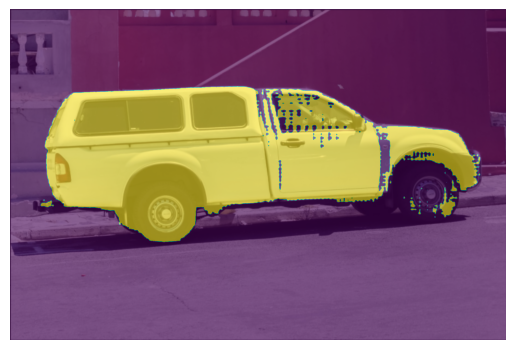

In [49]:
import matplotlib.pyplot as plt 

plt.imshow(raw_image)
plt.imshow(mask, alpha=0.6)
plt.axis('off')
plt.show()

In [50]:
type(mask)

numpy.ndarray

In [51]:
from PIL import Image
import torch
from transformers import SamModel, SamProcessor

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device: ", device)

model = SamModel.from_pretrained("facebook/sam-vit-base").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# Replace this with the path to your local image
image_path = "/home/ammara/Documents/helper_code/extracted_frames/movie_3/frame_0.jpg"

# Open the image from the local file system
raw_image = Image.open(image_path).convert("RGB")

input_points = [[[450, 600]]]  # 2D location of a window in the image

inputs = processor(raw_image, input_points=input_points, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

device:  cuda


In [52]:
mask = masks[0][0].cpu().numpy()
if mask.ndim == 3:
    mask = mask[0]  # Select the first channel if it's a 3D array
mask.shape

(960, 720)

In [53]:
raw_image.size

(720, 960)

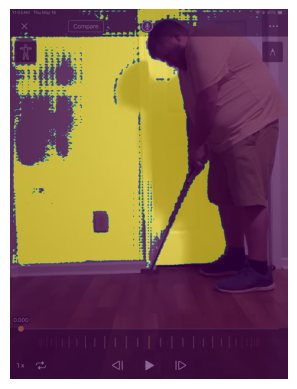

In [54]:
import matplotlib.pyplot as plt 

plt.imshow(raw_image)
plt.imshow(mask, alpha=0.6)
plt.axis('off')
plt.show()

## Give Cropped Images

## Give box prompt 

In [55]:
from transformers import SamModel, SamProcessor
import torch
import numpy as np

In [56]:
model = SamModel.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

In [57]:
import cv2

# Load your image
image = cv2.imread("/home/ammara/Documents/helper_code/extracted_frames/movie_3/frame_0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define your box prompt
# Format: [x_min, y_min, x_max, y_max]
# box_prompt = np.array([100, 100, 400, 400])

In [58]:
import numpy as np 

box_prompt = np.array([361.2272, 368.1149, 514.1579, 680.6292]).astype(int)
box_prompt

array([361, 368, 514, 680])

In [59]:
box_prompt = [[[361.2272, 368.1149, 514.1579, 680.6292]]]
print("Box prompt shape:", np.array(box_prompt).shape)

Box prompt shape: (1, 1, 4)


In [60]:
inputs = processor(
    image,
    input_boxes=box_prompt,
    return_tensors="pt"
)

In [61]:
inputs

{'pixel_values': tensor([[[[-1.1932, -1.2274, -1.1418,  ...,  0.0000,  0.0000,  0.0000],
          [-1.1932, -1.1760, -1.2445,  ...,  0.0000,  0.0000,  0.0000],
          [-1.1760, -1.2103, -1.2103,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [-1.4843, -1.4843, -1.4843,  ...,  0.0000,  0.0000,  0.0000],
          [-1.4843, -1.4843, -1.4843,  ...,  0.0000,  0.0000,  0.0000],
          [-1.4843, -1.4843, -1.4843,  ...,  0.0000,  0.0000,  0.0000]],

         [[-1.1604, -1.1954, -1.1078,  ...,  0.0000,  0.0000,  0.0000],
          [-1.1604, -1.1429, -1.2129,  ...,  0.0000,  0.0000,  0.0000],
          [-1.1429, -1.1779, -1.1779,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [-1.6856, -1.6856, -1.6856,  ...,  0.0000,  0.0000,  0.0000],
          [-1.6856, -1.6856, -1.6856,  ...,  0.0000,  0.0000,  0.0000],
          [-1.6856, -1.6856, -1.6856,  ...,  0.0000,  0.0000,  0.0000]],

         [[-0.9853, -1.0201, -0.9330,  ...,  0.0000,  0.0000,  0.0000],
          [-0

In [62]:
print("Inputs keys:", inputs.keys())
for key, value in inputs.items():
    if isinstance(value, torch.Tensor):
        print(f"{key} shape:", value.shape)

Inputs keys: dict_keys(['pixel_values', 'original_sizes', 'reshaped_input_sizes', 'input_boxes'])
pixel_values shape: torch.Size([1, 3, 1024, 1024])
original_sizes shape: torch.Size([1, 2])
reshaped_input_sizes shape: torch.Size([1, 2])
input_boxes shape: torch.Size([1, 1, 4])


In [63]:
with torch.no_grad():
    outputs = model(**inputs)

In [42]:
print("Pred masks shape:", outputs.pred_masks.shape)

Pred masks shape: torch.Size([1, 1, 3, 256, 256])


In [34]:
pred_masks = outputs.pred_masks.squeeze()
print("Pred masks shape after squeeze:", pred_masks.shape)

Pred masks shape after squeeze: torch.Size([3, 256, 256])


In [35]:
if pred_masks.ndim == 3:
    pred_masks = pred_masks.unsqueeze(0)
elif pred_masks.ndim == 1:
    pred_masks = pred_masks.view(1, 1, *pred_masks.shape)
print("Pred masks shape after reshape:", pred_masks.shape)

Pred masks shape after reshape: torch.Size([1, 3, 256, 256])


In [36]:
masks = processor.image_processor.post_process_masks(
    pred_masks,
    inputs["original_sizes"].squeeze(),
    inputs["reshaped_input_sizes"].squeeze()
)

ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [256] and output size of (1024, 1024). Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [33]:
masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.squeeze(1),  # Squeeze the second dimension
    inputs["original_sizes"].squeeze(),
    inputs["reshaped_input_sizes"].squeeze()
)

ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [256] and output size of (1024, 1024). Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.